TACRED官网：https://nlp.stanford.edu/projects/tacred/

# 1. 观察单条数据

In [41]:
# import json

train_path = 'train.json'
valid_path = 'dev.json'
test_path = 'test.json'
f = open(train_path, 'r', encoding='utf-8')
test = json.load(f)
test[0]
f.close()

{'label': 'org:founded',
 'text': 'Zagat Survey , the guide empire that started as a hobby for Tim and Nina Zagat in 1979 as a two-page typed list of New York restaurants compiled from reviews from friends , has been put up for sale , according to people briefed on the decision .',
 'ents': [['Zagat', 1, 5, 0.5], ['1979', 82, 86, 0.5]],
 'ann': [['Q140258', 0, 12, 0.57093775], ['Q7804542', 60, 78, 0.532475]]}

# 2. 转化成一个固定格式

如果处理Tacred数据集，直接运行下面的代码即可。

如果处理其他数据集，需要你自己分析数据的构成，合理的运用readlines()等函数，将数据集统一成key值一致的json格式，这样你就可以直接copy后面几节的代码。

In [19]:
import json
train_rel_fre_dict = {}
train_data = {}
temp1 = {}
temp2 = {}
def convert_dataset(old_path, new_path):
    with open(new_path, 'w', encoding = 'utf-8') as f_op:
        with open(old_path, 'r', encoding = 'utf-8') as f:
            for i in json.load(f):
                train_data['text'] = i['text']
                train_data['relation'] = i['label']
                temp1['id'] = '0'
                temp1['name'] = i['ents'][0][0]
                temp1['pos'] = [i['ents'][0][1], i['ents'][0][2]]
                train_data['h'] = temp1
                temp2['id'] = '1'
                temp2['name'] = i['ents'][1][0]
                temp2['pos'] = [i['ents'][1][1], i['ents'][1][2]]
                train_data['t'] = temp2
                json.dump(train_data, f_op)
                f_op.write('\n')

convert_dataset(train_path, 'tacred_train.txt')
convert_dataset(valid_path, 'tacred_valid.txt')
convert_dataset(test_path, 'tacred_test.txt')

In [46]:
# 看以看转化后一条数据的模样
f = open('tacred_train.txt', 'r', encoding='utf-8')
test = f.readlines()
print(test[0])
f.close()

{"text": "Zagat Survey , the guide empire that started as a hobby for Tim and Nina Zagat in 1979 as a two-page typed list of New York restaurants compiled from reviews from friends , has been put up for sale , according to people briefed on the decision .", "relation": "org:founded", "h": {"id": "0", "name": "Zagat", "pos": [1, 5]}, "t": {"id": "1", "name": "1979", "pos": [82, 86]}}



# 3. 绘制关系分布图

In [20]:
# 将数据路径替换成格式转化后的数据路径
train_path = 'tacred_train.txt'
valid_path = 'tacred_valid.txt'
test_path = 'tacred_test.txt'

In [33]:
import json
def dataset_description(path):
    rel_list = [] # 存放relation的列表
    count = 0 # 存放instances的计数
    with open(path, 'r', encoding = 'utf-8') as f:
        lines = f.readlines()
        for line in lines:
            line = json.loads(line) #loads后面括号中是字符串， load后面括号中写文件名字
            if line['relation'] not in rel_list:
                rel_list.append(line['relation'])
        count = len(lines)
        print(str(path)+"中类别数{}，实例数{}".format(len(rel_list), count))
    return rel_list, count


rel_list, count1 = dataset_description(train_path)
rel_list, count2 = dataset_description(valid_path)
rel_list, count3 = dataset_description(test_path)
print("实例数一共有：",count1+count2+count3)

tacred_train.txt中类别数42，实例数68124
tacred_valid.txt中类别数42，实例数22631
tacred_test.txt中类别数42，实例数15509
实例数一共有： 106264


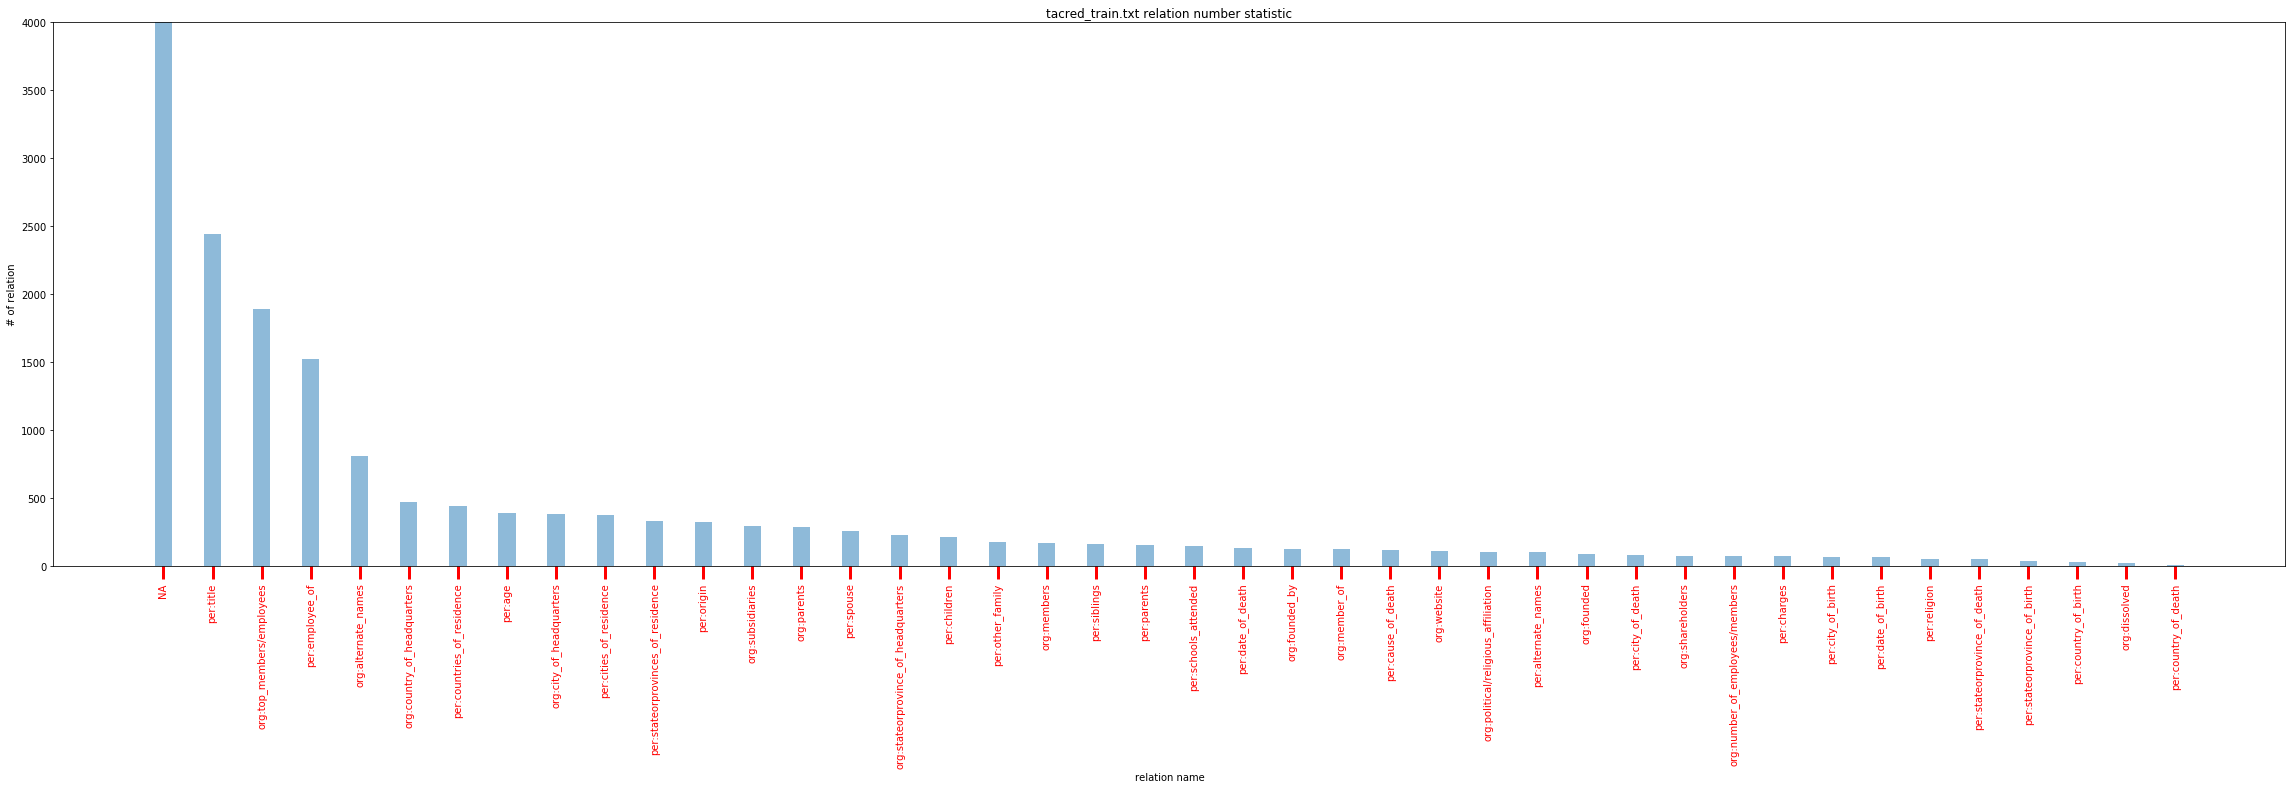

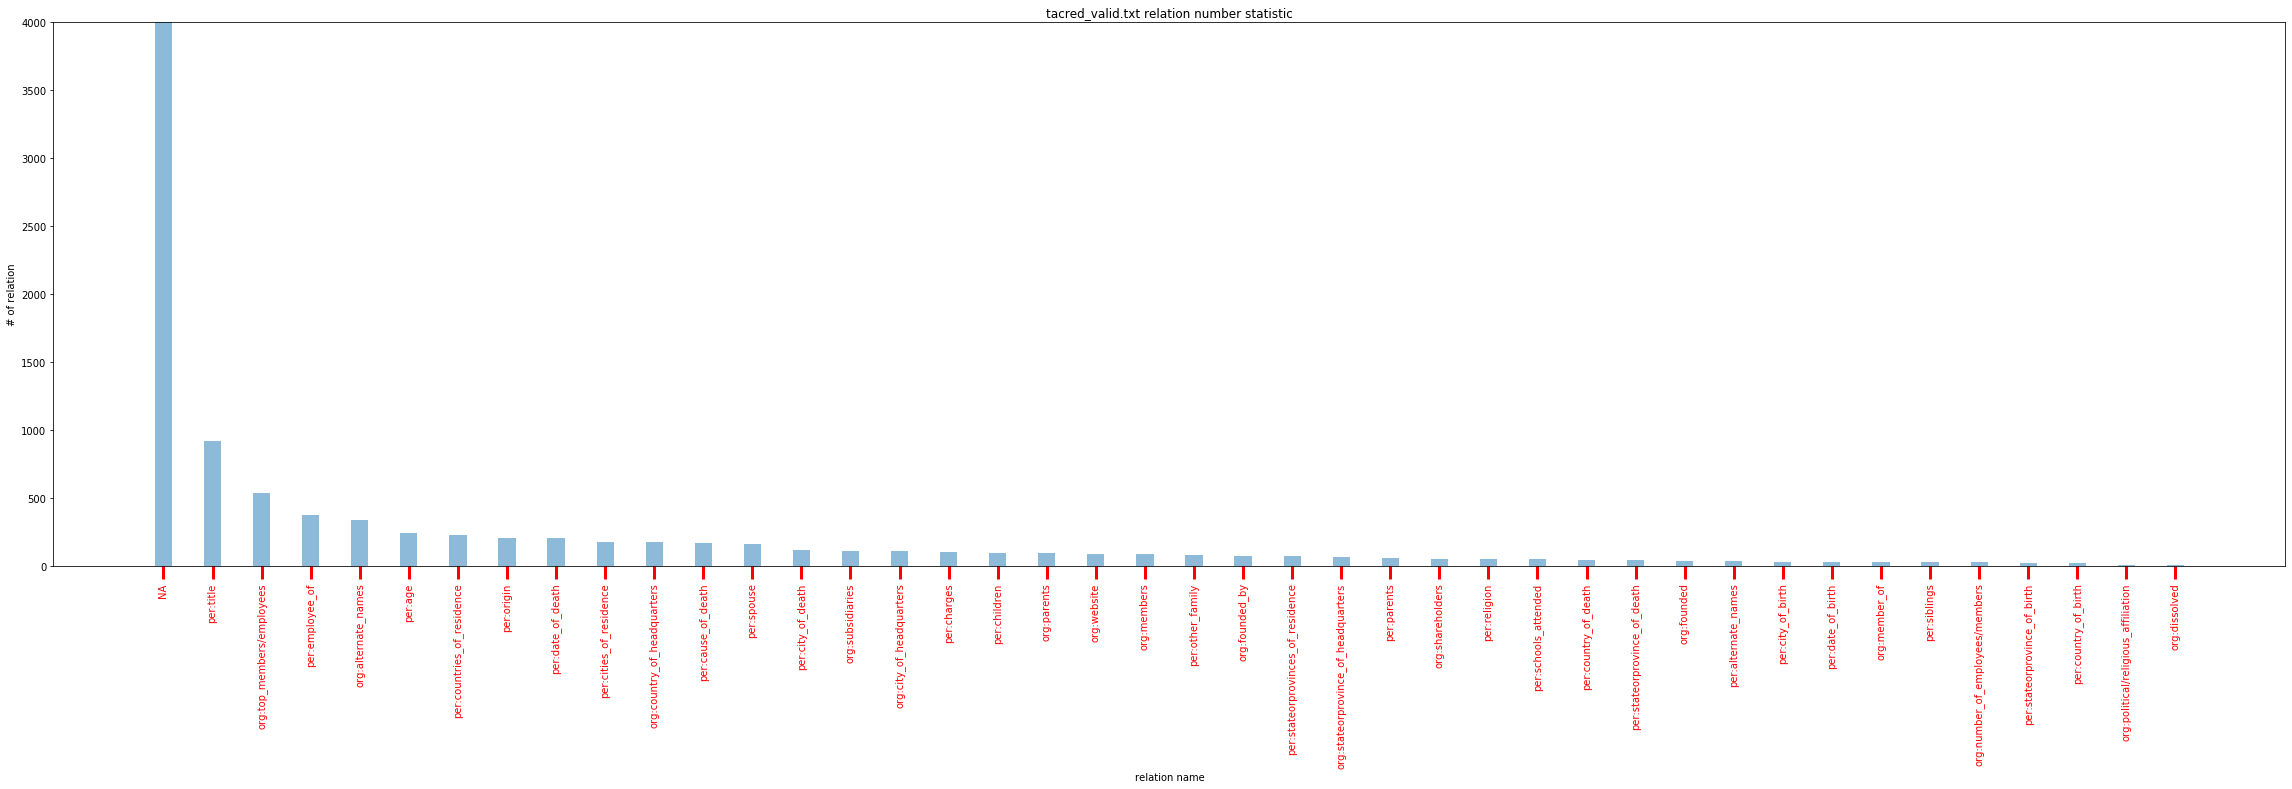

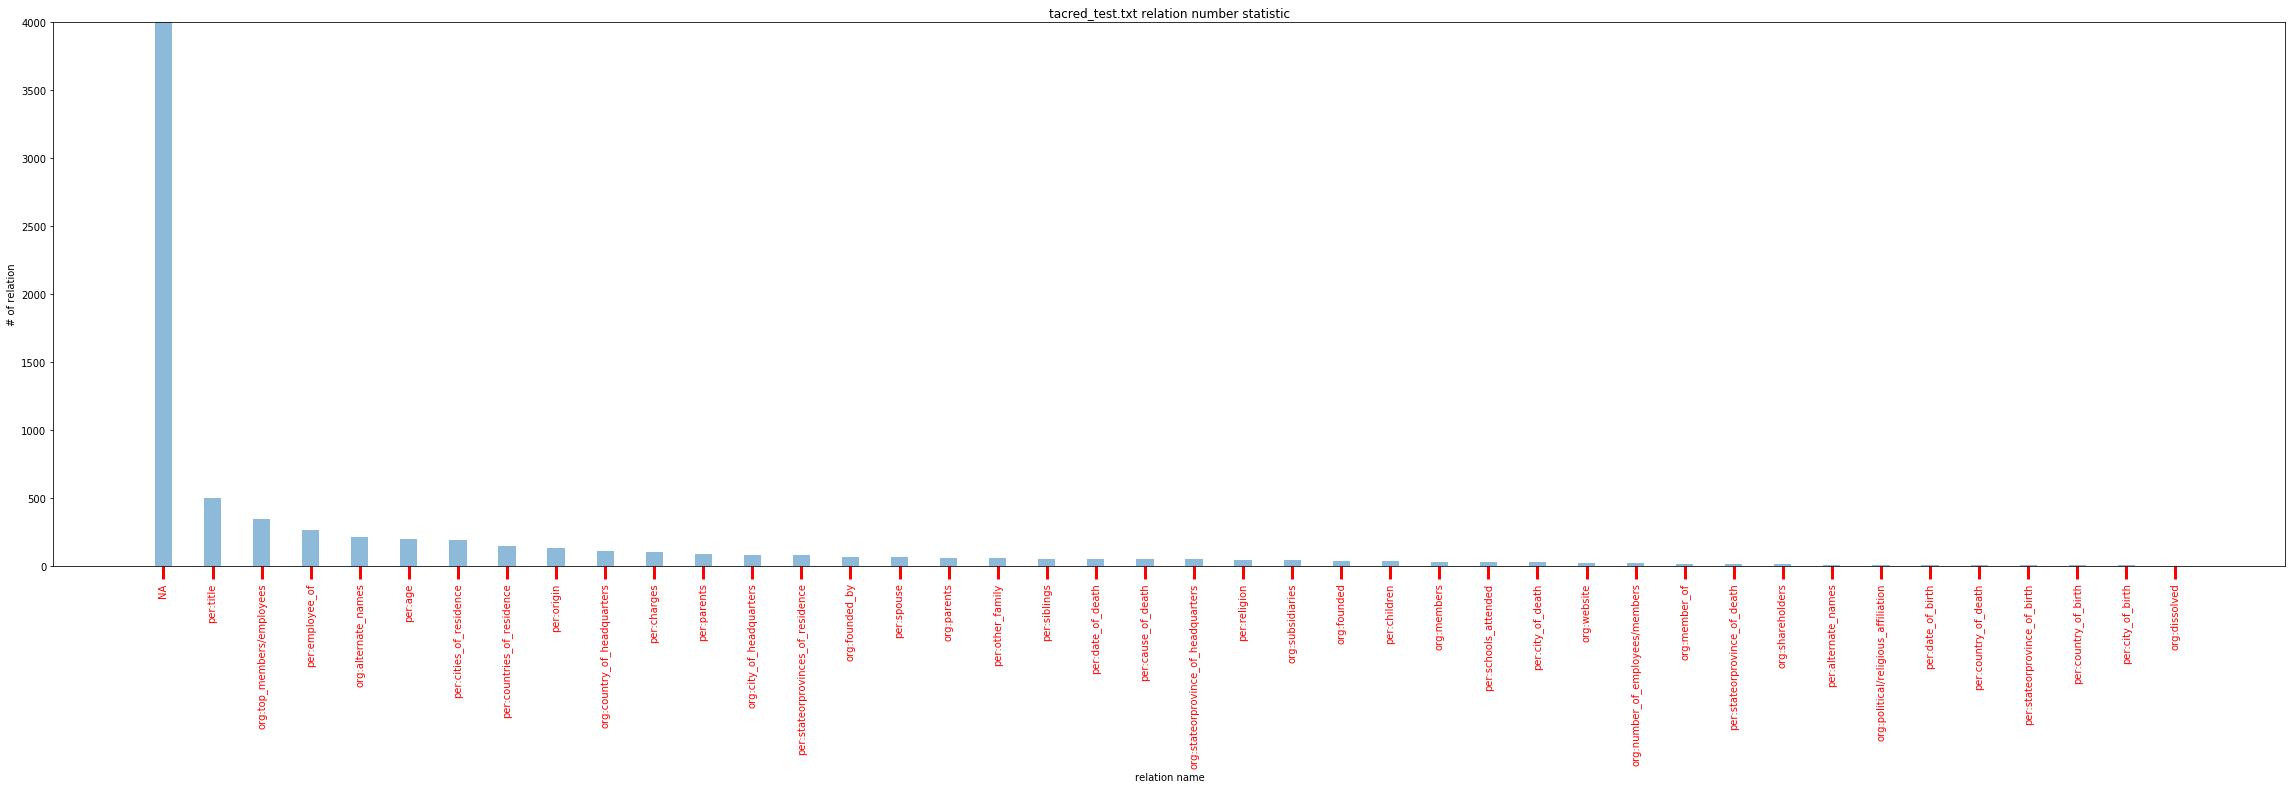

In [40]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_relation_distribution(dataset_path):
    # 1. 获取 Train Set 的数据
    rel_fre_dict = {}
    with open(dataset_path, 'r', encoding = 'utf-8') as f:
        # 2. 建立词频表
        for line in f.readlines():
            line = json.loads(line) # loads(字符串)， load(文件名字)
            if line['relation'] not in rel_fre_dict.keys():
                rel_fre_dict[line['relation']] = 1
            else:
                rel_fre_dict[line['relation']] += 1

    # print("train set中的Relation个数：",len(train_rel_fre_dict))

    # 3. 绘图
    x = []
    y = []
    width = []
    sorted_rel_fre_dict = sorted(rel_fre_dict.items(), key=lambda kv: (-kv[1])) # 按值排序
    for i in sorted_rel_fre_dict:
        x.append(i[0])
        y.append(i[1])
        width.append(0.35)
    plt.figure(figsize = [40, 10])
    plt.bar(x,y,width, align='center', alpha=0.5, clip_on = True)
    plt.ylim([0, 4000]) # 限制y轴数据的取值范围
    plt.xlabel("relation name")
    plt.ylabel("# of relation")
    plt.title(str(dataset_path)+' relation number statistic')
    plt.tick_params(axis='x', colors='red', length=13, width=3, rotation=90)
    plt.savefig(str(dataset_path)+'.png')

plot_relation_distribution(train_path)
plot_relation_distribution(valid_path)
plot_relation_distribution(test_path)

# 4. 分析数据集的不同子集（Trainset，Validset，Testset）是否有重复数据

In [12]:
# 将数据路径替换成格式转化后的数据路径
train_path = 'tacred_train.txt'
valid_path = 'tacred_valid.txt'
test_path = 'tacred_test.txt'

In [13]:
import json
def getRelationFrequencyDict(dataset_path):
    rel_fre_dict = {}
    with open(dataset_path, 'r', encoding = 'utf-8') as f:
        # 2. 建立关系频率表
        for line in f.readlines():
            line = json.loads(line) # loads(字符串)， load(文件名字)
            if line['relation'] not in rel_fre_dict.keys():
                rel_fre_dict[line['relation']] = 1
            else:
                rel_fre_dict[line['relation']] += 1
    return rel_fre_dict

train_rel_fre_dict = getRelationFrequencyDict(train_path)
valid_rel_fre_dict = getRelationFrequencyDict(valid_path)
test_rel_fre_dict = getRelationFrequencyDict(test_path)

In [14]:
train_rel_fre_dict

{'org:founded': 91,
 'org:subsidiaries': 296,
 'per:date_of_birth': 63,
 'per:cause_of_death': 117,
 'per:age': 390,
 'per:stateorprovince_of_birth': 38,
 'per:countries_of_residence': 445,
 'per:country_of_birth': 28,
 'per:stateorprovinces_of_residence': 331,
 'org:website': 111,
 'per:cities_of_residence': 374,
 'per:parents': 152,
 'per:employee_of': 1524,
 'NA': 55112,
 'per:city_of_birth': 65,
 'org:parents': 286,
 'org:political/religious_affiliation': 105,
 'per:schools_attended': 149,
 'per:country_of_death': 6,
 'per:children': 211,
 'org:top_members/employees': 1890,
 'per:date_of_death': 134,
 'org:members': 170,
 'org:alternate_names': 808,
 'per:religion': 53,
 'org:member_of': 122,
 'org:city_of_headquarters': 382,
 'per:origin': 325,
 'org:shareholders': 76,
 'per:charges': 72,
 'per:title': 2443,
 'org:number_of_employees/members': 75,
 'org:dissolved': 23,
 'org:country_of_headquarters': 468,
 'per:alternate_names': 104,
 'per:siblings': 165,
 'org:stateorprovince_of_

In [11]:
# 从上方三个字典中寻找出不同集合关系的交集和并集
commen_rel = train_rel_fre_dict.keys() & valid_rel_fre_dict.keys() & test_rel_fre_dict.keys()
train_without_commen = train_rel_fre_dict.keys() - commen_rel
valid_without_commen = valid_rel_fre_dict.keys() - commen_rel
test_without_commen = test_rel_fre_dict.keys() - commen_rel
print("train valid test中公共的关系个数：{}".format(len(commen_rel))) # 公共的关系数
print("train中关系个数",len(train_rel_fre_dict),"train中不包含公共关系剩下的有",len(train_without_commen),"分别是",train_without_commen)
print("valid中关系个数",len(valid_rel_fre_dict),"valid中不包含公共关系剩下的有",len(valid_without_commen),"分别是",valid_without_commen)
print("test 中关系个数",len(test_rel_fre_dict), "test中不包含公共关系剩下的有", len(test_without_commen) ,"分别是",test_without_commen)

train valid test中公共的关系个数：42
train中关系个数 42 train中不包含公共关系剩下的有 0 分别是 set()
valid中关系个数 42 valid中不包含公共关系剩下的有 0 分别是 set()
test 中关系个数 42 test中不包含公共关系剩下的有 0 分别是 set()


这个结果说明，三个集合拥有的关系数目相同。

In [34]:
import numpy as np

def diff_of_two_dataset(path_list):
    result = np.zeros((len(path_list), len(path_list)))
    dataset = []
    for path in path_list:
        f = open(path, 'r', encoding='utf-8')
        dataset.append(f)
#     dataset = [open(path,'r', 'utf-8') for path in path_list]
    for i in range(len(dataset)-1):
        for j in range(i+1,len(dataset)):
            temp_data = dataset[i].readlines()
            for line in dataset[j].readlines():
                if line in temp_data:
                    result[i][j] += 1
    print(result)
                
pathList = [train_path, valid_path, test_path]
diff_of_two_dataset(pathList)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


这个矩阵说明三个集合之间没有重复的实例。